In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import pandas as pd

import sys
sys.path.append('../')
import utils
import plotting



Bad key "text.kerning_factor" on line 4 in
/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
ds_MODEL = xr.open_mfdataset('../../GCrundirs/type_NA-out_conc-yr_2016-gridmod_final-validation/OutputDir/HEMCO_diagnostics.2016*.nc', combine = 'by_coords')
ds_NEI = xr.open_mfdataset('../../GCrundirs/type_NA-out_conc-yr_2016-gtropchem/merra2_05x0625_tropchem_na/OutputDir/HEMCO_diagnostics.2016*.nc', combine = 'by_coords')
ds_egrid = xr.open_mfdataset('../../GCrundirs/type_NA-out_conc-yr_2016-gridmod_final-validation-egrid/OutputDir/HEMCO_diagnostics.2016*.nc', combine = 'by_coords')

ds_egrid = ds_egrid.isel(lev = 0)
ds_NEI = ds_NEI.isel(lev = 0)
ds_MODEL = ds_MODEL.isel(lev = 0)

ds = xr.concat([ds_egrid, ds_NEI, ds_MODEL], pd.Index(['egrid', 'NEI', 'MODEL'], name='model_name'))

# Look at the emissions of PM2.5 contributing factors

Options: Ship, BioBurn, Anthro, 
OCPO, OCPI, BCPO, BCPI

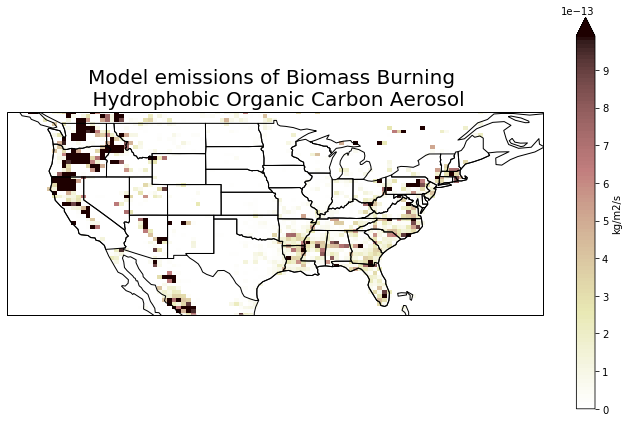

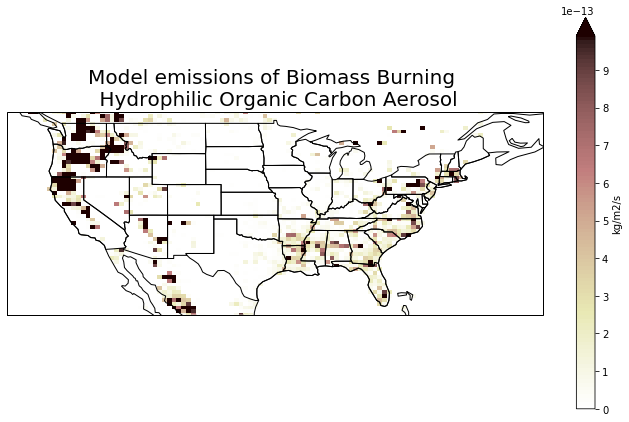

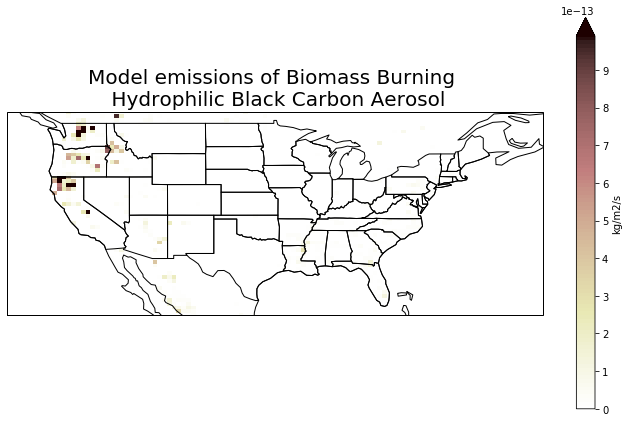

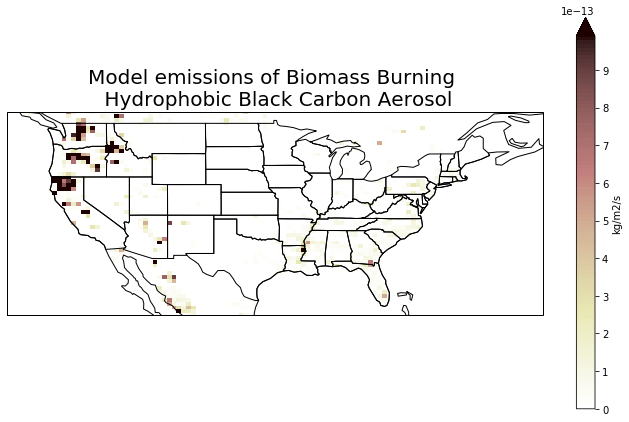

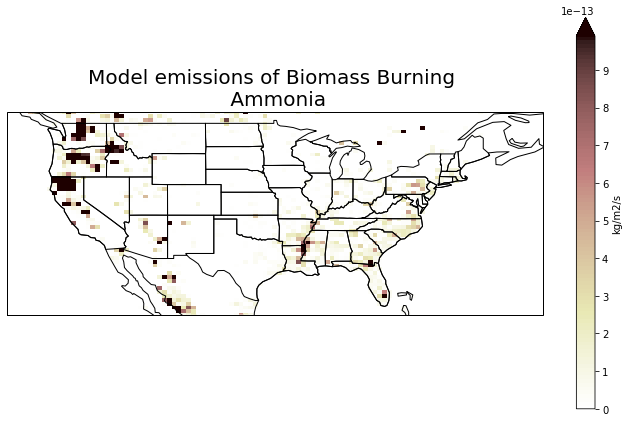

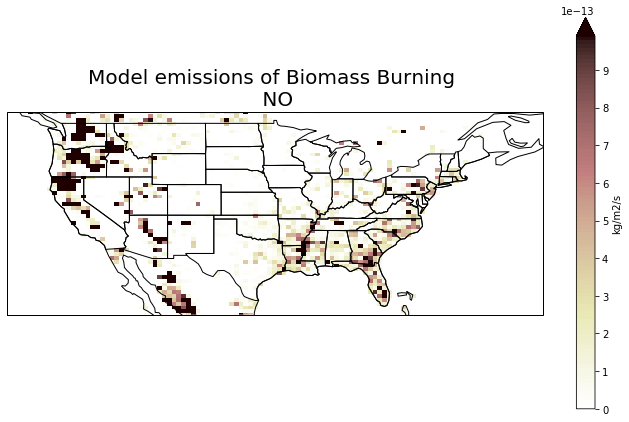

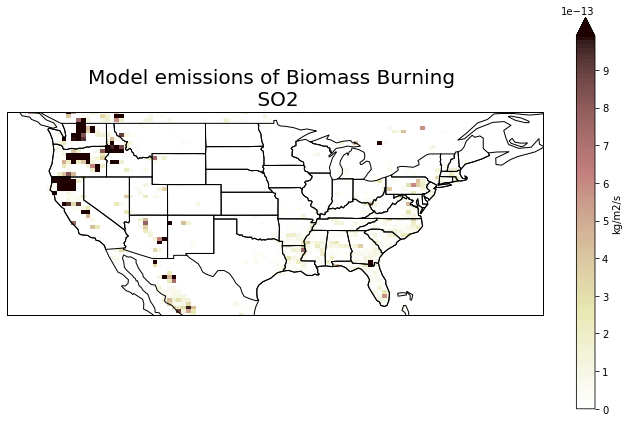

In [3]:
plotting.plot_emissions(ds.sel(model_name = 'MODEL'), 'EmisOCPO_BioBurn','JJA',np.arange(0,1e-12,1e-14))
plt.title('Model emissions of Biomass Burning \n Hydrophobic Organic Carbon Aerosol', fontsize = 20)

plotting.plot_emissions(ds.sel(model_name = 'MODEL'), 'EmisOCPI_BioBurn','JJA',np.arange(0,1e-12,1e-14))
plt.title('Model emissions of Biomass Burning \n Hydrophilic Organic Carbon Aerosol', fontsize = 20)

plotting.plot_emissions(ds.sel(model_name = 'MODEL'), 'EmisBCPI_BioBurn','JJA',np.arange(0,1e-12,1e-14))
plt.title('Model emissions of Biomass Burning \n Hydrophilic Black Carbon Aerosol', fontsize = 20)

plotting.plot_emissions(ds.sel(model_name = 'MODEL'), 'EmisBCPO_BioBurn','JJA',np.arange(0,1e-12,1e-14))
plt.title('Model emissions of Biomass Burning \n Hydrophobic Black Carbon Aerosol', fontsize = 20);

plotting.plot_emissions(ds.sel(model_name = 'MODEL'), 'EmisNH3_BioBurn','JJA',np.arange(0,1e-12,1e-14))
plt.title('Model emissions of Biomass Burning \n Ammonia', fontsize = 20);

plotting.plot_emissions(ds.sel(model_name = 'MODEL'), 'EmisNO_BioBurn','JJA',np.arange(0,1e-12,1e-14))
plt.title('Model emissions of Biomass Burning \n NO', fontsize = 20);

plotting.plot_emissions(ds.sel(model_name = 'MODEL'), 'EmisSO2_BioBurn','JJA',np.arange(0,1e-12,1e-14))
plt.title('Model emissions of Biomass Burning \n SO2', fontsize = 20);


/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)
/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)
/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)
/home/emfreese/anaconda3/envs/conda_env/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/e

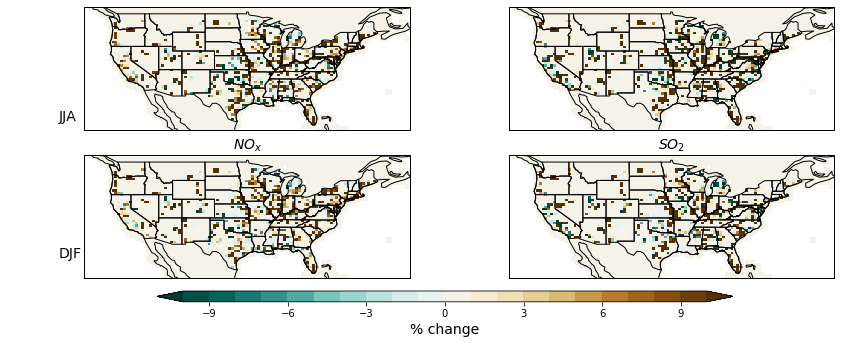

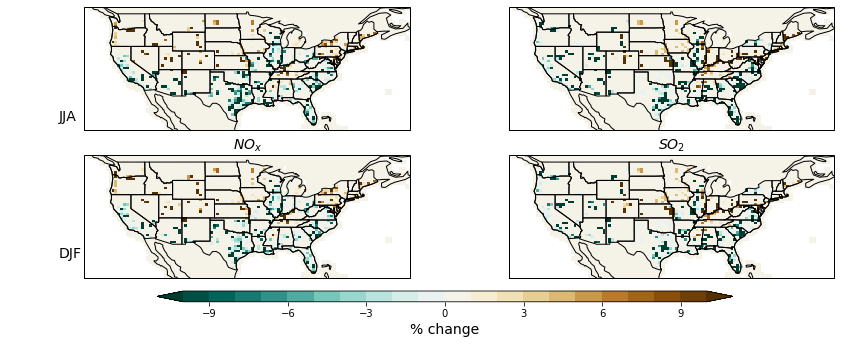

In [26]:
plotting.plot_percent_emissions_dif(ds.sel(model_name = 'NEI'), ds.sel(model_name = 'MODEL'), 
                                    ['EmisNO_Anthro', 'EmisSO2_Anthro'],['JJA','DJF'], 
                                    levels = np.arange(-10,11,1), lat_lon = utils.lat_lon_dict['US_lat_lon'], figsize = [16,5])
plt.savefig('./Figures/NEI_model_emis_dif.png', bbox_inches = 'tight', dpi = 150)
plotting.plot_percent_emissions_dif(ds.sel(model_name = 'egrid'), ds.sel(model_name = 'MODEL'), 
                                    ['EmisNO_Anthro', 'EmisSO2_Anthro'],['JJA','DJF'], 
                                    levels = np.arange(-10,11,1), lat_lon = utils.lat_lon_dict['US_lat_lon'], figsize = [16,5])
plt.savefig('./Figures/egrid_model_emis_dif.png', bbox_inches = 'tight', dpi = 150)
